In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('data.csv', delimiter=';')

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Correct a column name that has a typo and replace single quotes with underscores
df.rename(columns = {"Nacionality": "Nationality",
                           "Mother's qualification": "Mother_qualification",
                           "Father's qualification": "Father_qualification",
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation",
                           "Age at enrollment": "Age"}, inplace = True)

# Replace white space in the column names with underscore
df.columns = df.columns.str.replace(' ', '_')

# Remove the parenthesis
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')


In [ ]:
# device the columns into categorical or numerical
def check_column_types(df):
    numeric_columns, categorical_columns = [], []
    threshold = 5
    for column in df.columns:
        unique_values = df[column].nunique()
        total_values = len(df[column])

        if pd.api.types.is_numeric_dtype(df[column]):
            if unique_values < threshold:
                categorical_columns.append(column)
            else:
                numeric_columns.append(column)
        else:
            categorical_columns.append(column)


    return numeric_columns, categorical_columns

numeric_columns, categorical_columns = check_column_types(df)
print(f"numeric columns = {numeric_columns}")
print(f"categoric columns = {categorical_columns}")

numeric columns = ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Previous_qualification', 'Previous_qualification_grade', 'Nationality', 'Mother_qualification', 'Father_qualification', 'Mother_occupation', 'Father_occupation', 'Admission_grade', 'Age', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']
categoric columns = ['Daytime/evening_attendance\t', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Target']


In [ ]:
# scale the numeric features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance\t,Previous_qualification,Previous_qualification_grade,Nationality,Mother_qualification,Father_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,1,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,Dropout
1,-0.294829,-0.209869,-0.554068,0.192580,1,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,Graduate
2,-0.294829,-1.010660,2.490896,0.103404,1,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,Dropout
3,-0.294829,-0.095470,0.207173,0.444115,1,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,Graduate
4,1.356212,1.162916,-0.554068,-0.408389,0,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,Graduate


In [ ]:
# one hot encode the categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


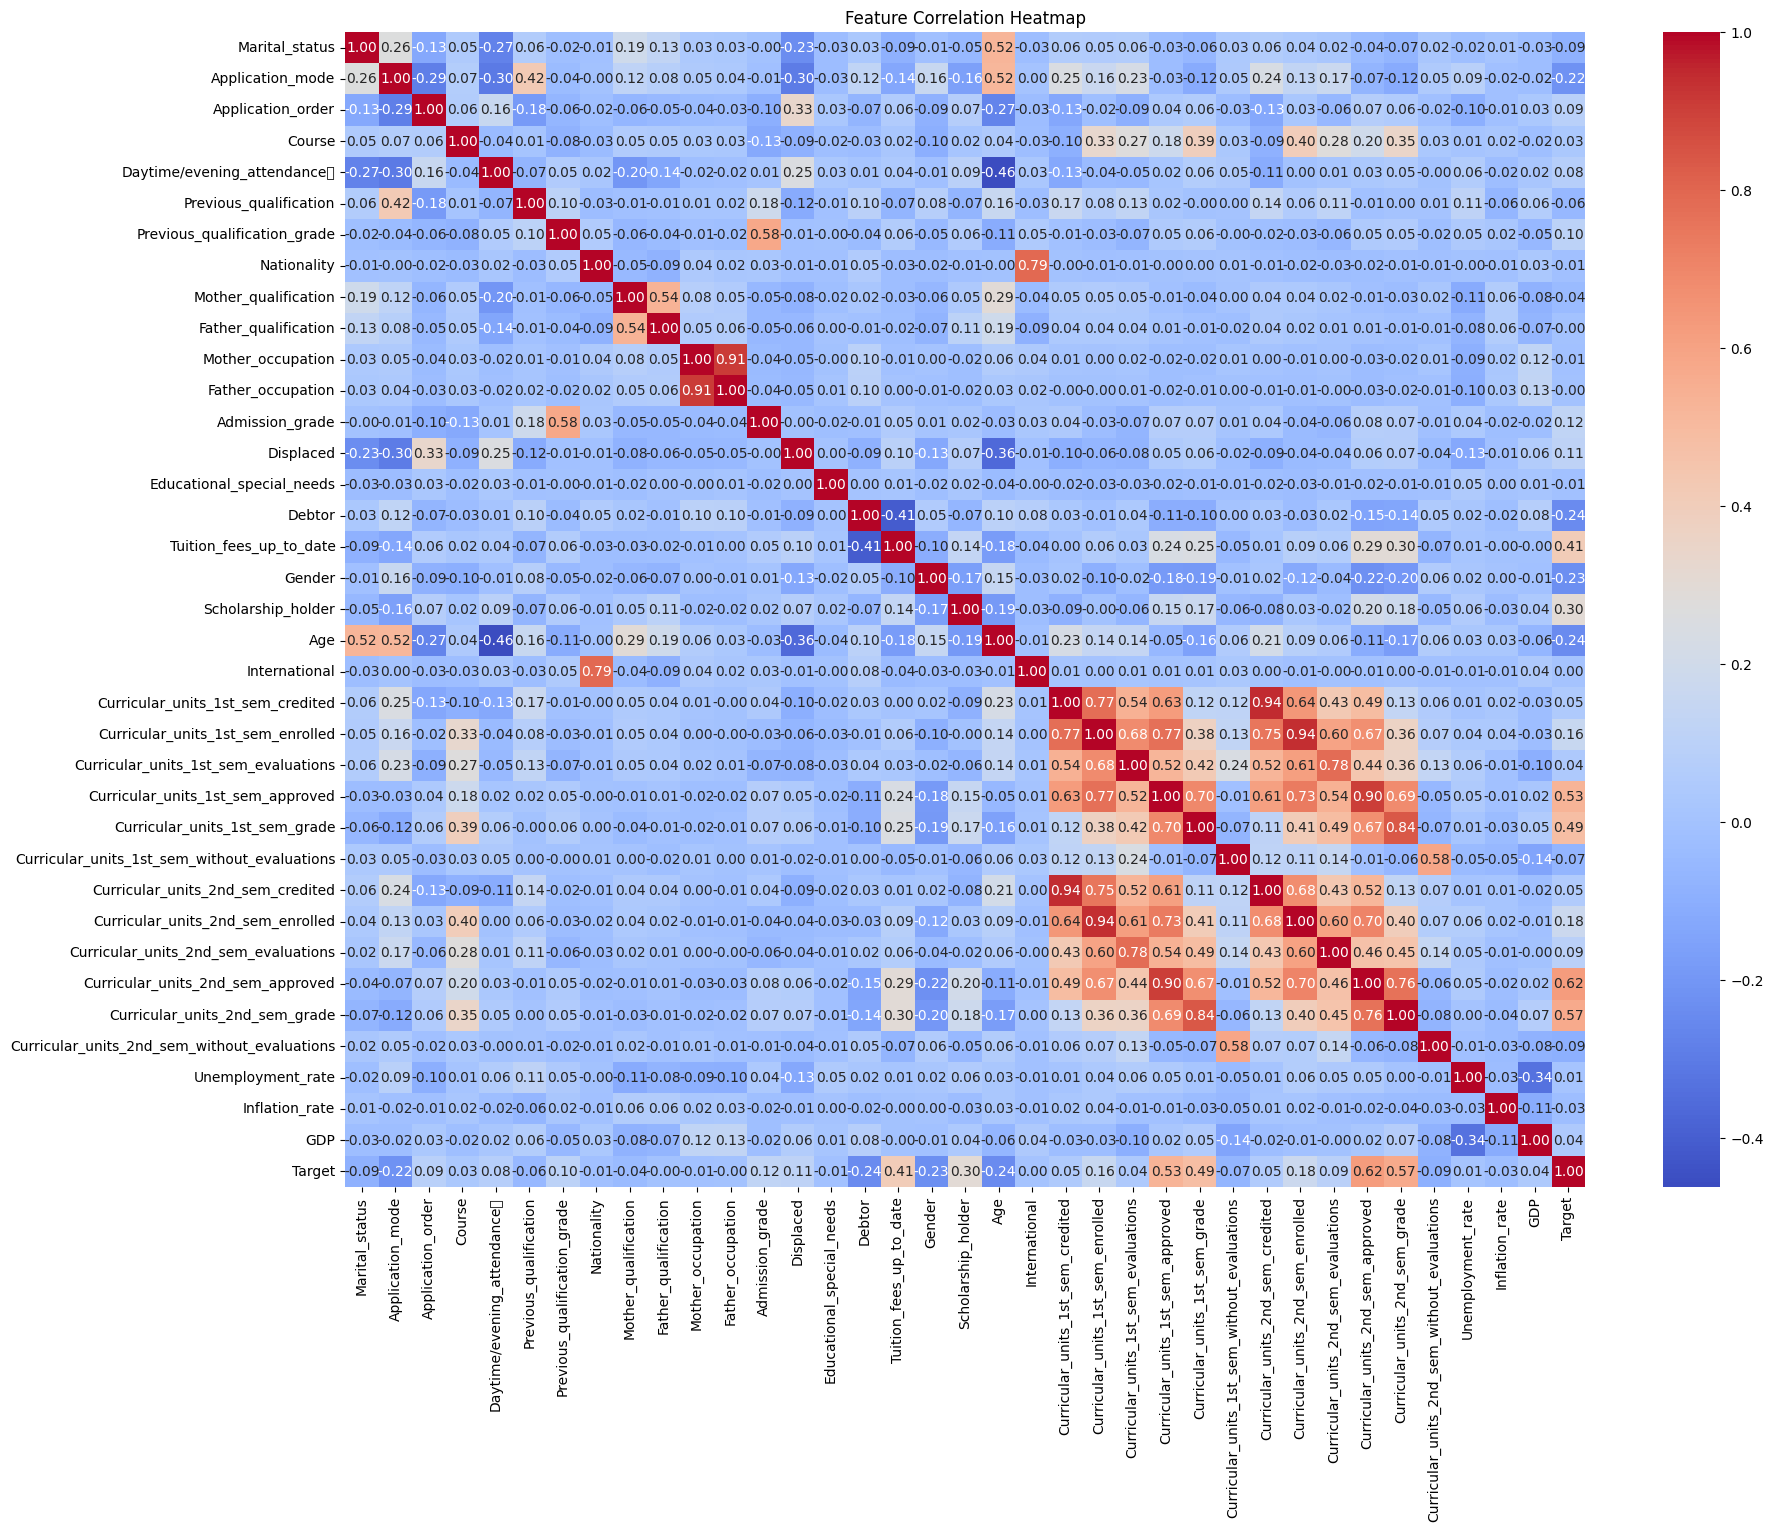

In [ ]:
# printing the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# printing the corellation values of each input feature with the 'Target'
label_correlations = correlation_matrix['Target'].drop('Target')
sorted_features = label_correlations.abs().sort_values(ascending=False)
sorted_features

,Target
Curricular_units_2nd_sem_approved,0.624157
Curricular_units_2nd_sem_grade,0.566827
Curricular_units_1st_sem_approved,0.529123
Curricular_units_1st_sem_grade,0.485207
Tuition_fees_up_to_date,0.409827
Scholarship_holder,0.297595
Age,0.243438
Debtor,0.240999
Gender,0.229270
Application_mode,0.221747


In [ ]:
# Devide the columns into input features X and output labels y
target_column = "Target"
X = df.drop(columns=target_column)
y = df[target_column]

In [ ]:
# use only the features that have above a certain level of correlation with the Target columm
label_correlations = correlation_matrix['Target'].drop('Target')
threshold = 0.1
selected_features = label_correlations[abs(label_correlations) > threshold].index.tolist()
X = X[selected_features]
selected_features

['Application_mode',
 'Previous_qualification_grade',
 'Admission_grade',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade']

In [ ]:
y.head()

,Target
0,0
1,2
2,0
3,2
4,2


In [ ]:
# split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [ ]:
# function to print the confusion matrix for a model
def print_confusion_matrix(model_name, y_true, y_pred):
    print(f"Confusion Matrix for {model_name}:\n")
    cm = confusion_matrix(y_true, y_pred)
    # Optionally display the confusion matrix visually
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=set(y_true))
    disp.plot(cmap="Blues")

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       284
           1       0.51      0.26      0.34       169
           2       0.76      0.92      0.83       432

    accuracy                           0.74       885
   macro avg       0.68      0.64      0.65       885
weighted avg       0.71      0.74      0.72       885

Confusion Matrix for LogisticRegression(max_iter=3000):



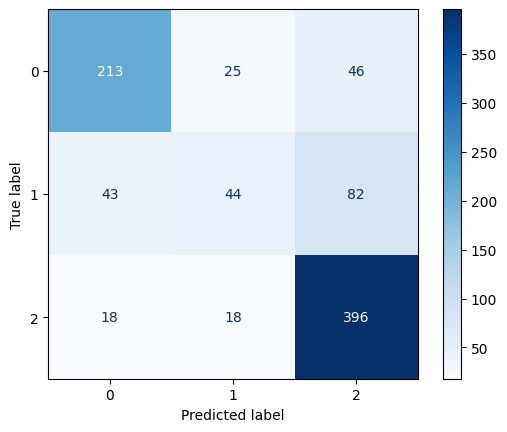

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=3000, solver='lbfgs')
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print(classification_report(y_test, lr_preds))

print_confusion_matrix(lr, y_test, lr_preds)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       284
           1       0.43      0.29      0.35       169
           2       0.75      0.88      0.81       432

    accuracy                           0.71       885
   macro avg       0.64      0.63      0.63       885
weighted avg       0.69      0.71      0.70       885

Confusion Matrix for KNeighborsClassifier(n_neighbors=3):



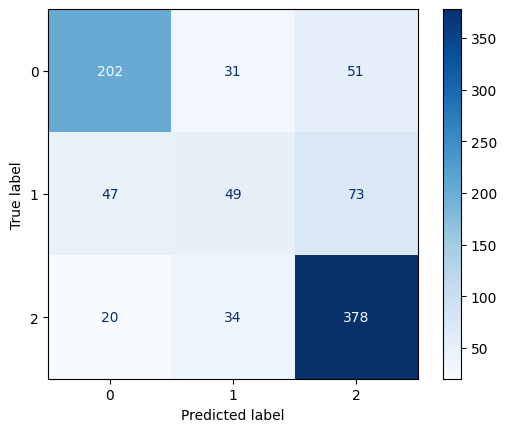

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print(classification_report(y_test, knn_preds))

print_confusion_matrix(knn, y_test, knn_preds)

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       284
           1       0.39      0.38      0.38       169
           2       0.78      0.78      0.78       432

    accuracy                           0.67       885
   macro avg       0.61      0.61      0.61       885
weighted avg       0.67      0.67      0.67       885

Confusion Matrix for DecisionTreeClassifier(random_state=42):



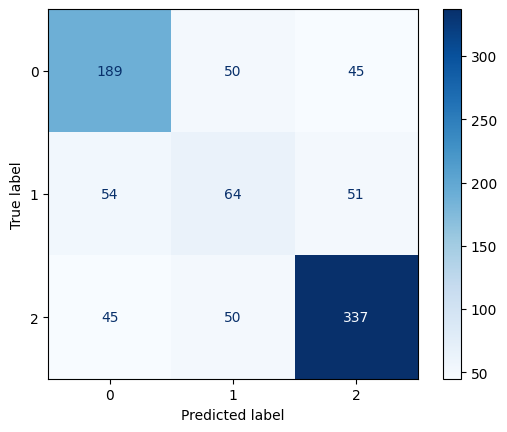

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print(classification_report(y_test, dt_preds))

print_confusion_matrix(dt, y_test, dt_preds)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       284
           1       0.51      0.32      0.39       169
           2       0.77      0.91      0.83       432

    accuracy                           0.74       885
   macro avg       0.69      0.65      0.66       885
weighted avg       0.72      0.74      0.72       885

Confusion Matrix for RandomForestClassifier(random_state=42):



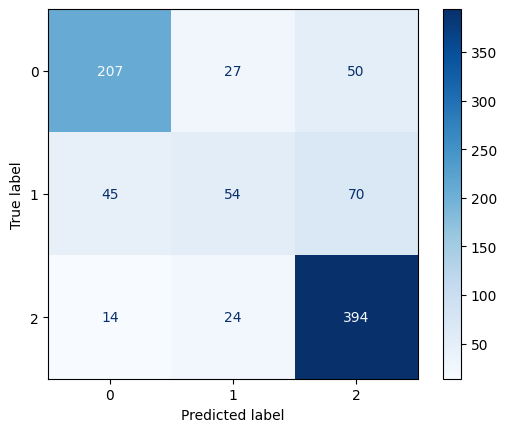

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print(classification_report(y_test, rf_preds))

print_confusion_matrix(rf, y_test, rf_preds)